In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
daily_activity = pd.read_csv("dailyActivity.csv")
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,04-12-2016
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13-04-2016
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14-04-2016
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15-04-2016
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16-04-2016


In [3]:
sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log = pd.read_csv("weightLogInfo_merged.csv")

In [4]:
daily_activity.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Date'],
      dtype='object')

In [ ]:
#daily_activity = daily_activity.rename(columns={'Date':'Yr_Date'})  #changed column to Date

In [5]:
daily_activity.insert(len(daily_activity.columns),"week_day","0")   #adding weekday column to the last index. 

In [6]:
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'])  #changed Date format by using to_date()
daily_activity['week_day']=daily_activity['Date'].dt.day_name()  #assigned day values to week_day column.
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,week_day
0,1503960366,04-12-2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-04-12,Tuesday
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13,Wednesday
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016-04-14,Thursday
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15,Friday
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,05-08-2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016-05-08,Sunday
936,8877689391,05-09-2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016-05-09,Monday
937,8877689391,05-10-2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016-05-10,Tuesday
938,8877689391,05-11-2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016-05-11,Wednesday


In [7]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [8]:
sleep_day["SleepDay"] = pd.to_datetime(sleep_day["SleepDay"])  #before splitting change to datatype to date format

In [9]:
sleep_day["Date"] = sleep_day["SleepDay"].dt.date 
sleep_day["Time"] = sleep_day["SleepDay"].dt.time   #added new columns to the dataframe

In [10]:
weight_log= weight_log.rename(columns={"Date":"DateTime"})  # renamed the column
weight_log['DateTime'] = pd.to_datetime(weight_log['DateTime'])

In [11]:
weight_log["Date"] = weight_log["DateTime"].dt.date
weight_log["Time"] = weight_log["DateTime"].dt.time

In [12]:
weight_log

,Id,DateTime,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,Date,Time
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,2016-05-02,23:59:59
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,2016-05-03,23:59:59
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,2016-04-13,01:08:52
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,2016-04-21,23:59:59
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,2016-05-12,23:59:59
...,...,...,...,...,...,...,...,...,...,...
62,8877689391,2016-05-06 06:43:35,85.000000,187.392923,NaN,25.440001,False,1462517015000,2016-05-06,06:43:35
63,8877689391,2016-05-08 07:35:53,85.400002,188.274775,NaN,25.559999,False,1462692953000,2016-05-08,07:35:53
64,8877689391,2016-05-09 06:39:44,85.500000,188.495234,NaN,25.610001,False,1462775984000,2016-05-09,06:39:44
65,8877689391,2016-05-11 06:51:47,85.400002,188.274775,NaN,25.559999,False,1462949507000,2016-05-11,06:51:47


In [13]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,week_day
0,1503960366,04-12-2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,2016-04-12,Tuesday
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,2016-04-13,Wednesday
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,2016-04-14,Thursday
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,2016-04-15,Friday
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,2016-04-16,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,05-08-2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,2016-05-08,Sunday
936,8877689391,05-09-2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,2016-05-09,Monday
937,8877689391,05-10-2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,2016-05-10,Tuesday
938,8877689391,05-11-2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,2016-05-11,Wednesday


No handles with labels found to put in legend.


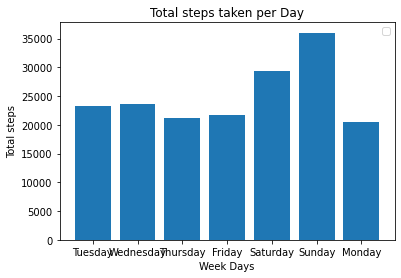

In [14]:
plt.bar(daily_activity['week_day'],daily_activity['TotalSteps'])
plt.xlabel("Week Days")
plt.ylabel("Total steps")
plt.title("Total steps taken per Day")
plt.legend()

Text(0.5, 1.0, 'Total Distance covered per Day')

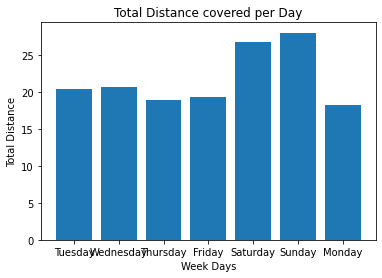

In [15]:
 plt.bar(daily_activity['week_day'],daily_activity['TotalDistance'])
 plt.xlabel("Week Days")
plt.ylabel("Total Distance")
plt.title("Total Distance covered per Day")

In [16]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Time
0,1503960366,2016-04-12,1,327,346,2016-04-12,00:00:00
1,1503960366,2016-04-13,2,384,407,2016-04-13,00:00:00
2,1503960366,2016-04-15,1,412,442,2016-04-15,00:00:00
3,1503960366,2016-04-16,2,340,367,2016-04-16,00:00:00
4,1503960366,2016-04-17,1,700,712,2016-04-17,00:00:00
...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,2016-04-30,00:00:00
409,8792009665,2016-05-01,1,503,527,2016-05-01,00:00:00
410,8792009665,2016-05-02,1,415,423,2016-05-02,00:00:00
411,8792009665,2016-05-03,1,516,545,2016-05-03,00:00:00


In [64]:
daily_activity["TotalExerciseMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalExerciseHours"] = round(daily_activity["TotalExerciseMinutes"] / 60, 2)

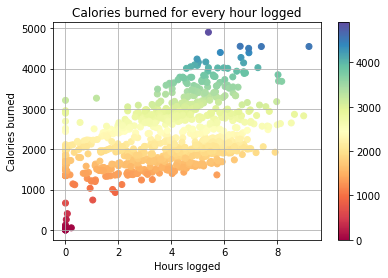

<Figure size 720x504 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt
y = plt.scatter(daily_activity.TotalExerciseHours, daily_activity.Calories, alpha = 1.0, c = daily_activity.Calories, cmap = "Spectral")
plt.colorbar(y,orientation = "vertical")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.grid(True)
plt.figure(figsize=(10,7))
plt.show()

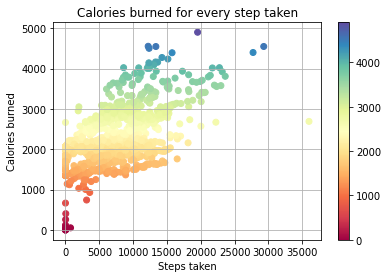

<Figure size 720x504 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
x = plt.scatter(daily_activity.TotalSteps, daily_activity.Calories, alpha = 1.0, c = daily_activity.Calories, cmap = "Spectral")
plt.colorbar(x,orientation='vertical')
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.figure(figsize=(10,7))
plt.show()